In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from ml1 import fit, Linear, Sequential, ReLU, LogSoftmax

In [2]:
folder = "data"

In [118]:
X_train = np.load(os.path.join(folder, "X_train.npy"))
y_train = np.load(os.path.join(folder,"y_train.npy"))
X_valid = np.load(os.path.join(folder,"X_valid.npy"))
y_valid = np.load(os.path.join(folder,"y_valid.npy"))

In [119]:
X_traint = torch.as_tensor(X_train)
y_traint = torch.as_tensor(y_train)
X_validt = torch.as_tensor(X_valid)
y_validt = torch.as_tensor(y_valid)

In [136]:
y_traint.dtype, y_train.dtype, y_validt.dtype

(torch.int64, dtype('int64'), torch.int64)

In [121]:
X_train.shape, y_train.shape

((50000, 784), (50000,))

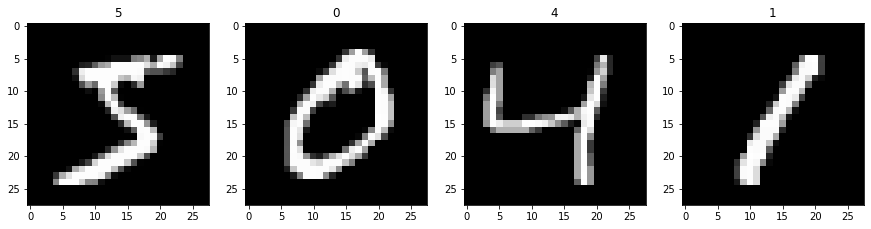

In [122]:
fig, ax = plt.subplots(1, 4, figsize=(15 ,10))
for i in range(4):
    ax[i].set_title(y_train[i])
    ax[i].imshow(X_train[i].reshape(-1, 28), cmap="gray")
plt.show()

In [179]:
def accuracy(preds, y_valid):
    values, idxs = preds.max(1)
    accuracy = float(torch.sum(idxs == y_valid))
    return accuracy

In [180]:
def validate(net, X_valid, y_valid, crit):
    with torch.no_grad():
        loss = crit(net(X_valid), y_valid)
    return loss

In [181]:
def step(net, X_batch, y_batch, crit, opt):
    opt.zero_grad()
    preds = net(X_batch)
    loss = crit(preds, y_batch)
    acc = accuracy(preds, y_batch)
    loss.backward()
    opt.step()
    return loss, acc

In [223]:
def fit(net, X_train, y_train, X_valid, y_valid, crit, opt, batch_size=100, n_epochs=1):
    set_size = X_train.shape[0]
    idxs = np.arange(set_size)
    n_batches = (set_size // batch_size)
    for epoch in range(n_epochs):
        np.random.shuffle(idxs)
        loss = 0
        acc = 0
        for batch in range(n_batches):
            start = batch * batch_size
            batch_idxs = idxs[start: start + batch_size]
            X_batch = X_train[batch_idxs]
            y_batch = y_train[batch_idxs]
            b_loss, b_acc = step(net, X_batch, y_batch, crit, opt)
            loss += b_loss
            acc += b_acc
        loss = loss / n_batches
        acc = acc / n_batches
        val_loss = validate(net, X_valid, y_valid, crit)
        print(f"{epoch + 1} acc:{acc:.3f}, loss:{loss:.3f}, val_loss:{val_loss:.3f}")

In [205]:
def view_some_preds(net, X, y):
    with torch.no_grad():
        output = net(X)
        values, preds = output.max(1)
        idxs = np.random.choice(preds.shape[0], size=16,replace=False)
        fig, ax = plt.subplots(4,4, figsize=(15, 10))
        plot_n = 0
        for i in range(4):
            for j in range(4):
                idx = idxs[plot_n]
                ax[i, j].set_title(str(int(preds[idx])) + "(" + str(int(y[idx])) + ")")
                ax[i, j].imshow(X[idx].reshape(28, 28), cmap="gray")
                ax[i, j].axis("off")
                plot_n += 1
        plt.show()

In [247]:
tnet = nn.Sequential(nn.Linear(28*28, 10), nn.ReLU(), nn.LogSoftmax())
crit = nn.NLLLoss()

In [248]:
opt = optim.SGD(tnet.parameters(), lr=0.01)

In [249]:
fit(tnet, X_traint, y_traint, X_validt, y_validt, crit, opt, n_epochs=20)

1 acc:66.536, loss:1.457, val_loss:0.929
2 acc:84.010, loss:0.772, val_loss:0.605
3 acc:86.112, loss:0.603, val_loss:0.510
4 acc:87.044, loss:0.533, val_loss:0.462
5 acc:87.586, loss:0.492, val_loss:0.432
6 acc:88.060, loss:0.465, val_loss:0.410
7 acc:88.440, loss:0.445, val_loss:0.395
8 acc:88.680, loss:0.429, val_loss:0.383
9 acc:88.906, loss:0.417, val_loss:0.373
10 acc:89.140, loss:0.407, val_loss:0.365
11 acc:89.278, loss:0.398, val_loss:0.358
12 acc:89.428, loss:0.391, val_loss:0.352
13 acc:89.570, loss:0.384, val_loss:0.347
14 acc:89.698, loss:0.379, val_loss:0.342
15 acc:89.778, loss:0.373, val_loss:0.338
16 acc:89.888, loss:0.369, val_loss:0.335
17 acc:89.984, loss:0.365, val_loss:0.332
18 acc:90.098, loss:0.361, val_loss:0.329
19 acc:90.114, loss:0.357, val_loss:0.326
20 acc:90.230, loss:0.354, val_loss:0.324


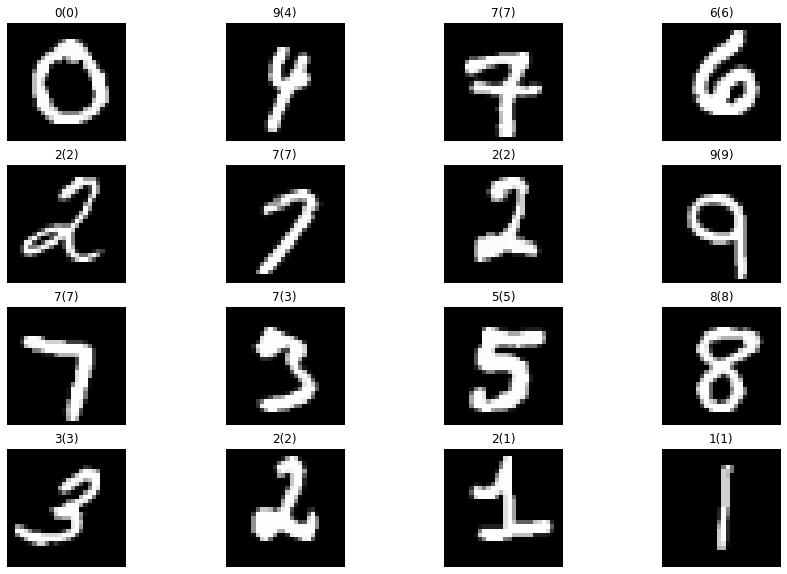

In [222]:
view_some_preds(tnet, X_traint, y_traint)

In [ ]:
mynet = Sequential(Linear(28*28, 10), ReLU(), LogSoftmax())
myloss = ""